# Dataset: 7k Books
Source - https://www.kaggle.com/datasets/dylanjcastillo/7k-books-with-metadata

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [ ]:
import pandas as pd

In [ ]:
books = pd.read_csv(f"{path}/books.csv")

In [ ]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


# Data Cleaning

**1. Removing Samples with Missing Values**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

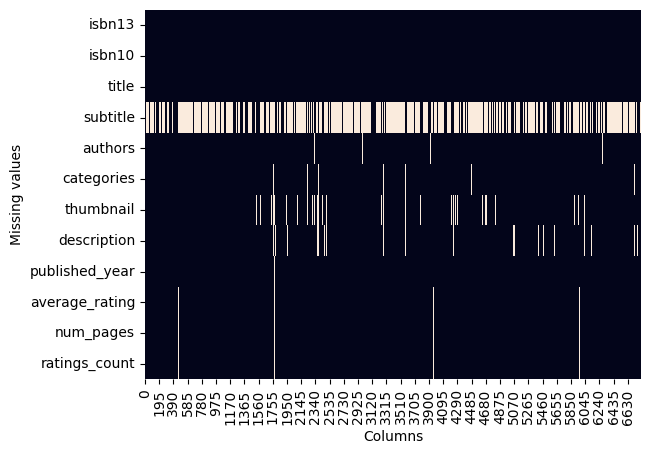

In [ ]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

In [ ]:
import numpy as np

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2024 - books["published_year"]

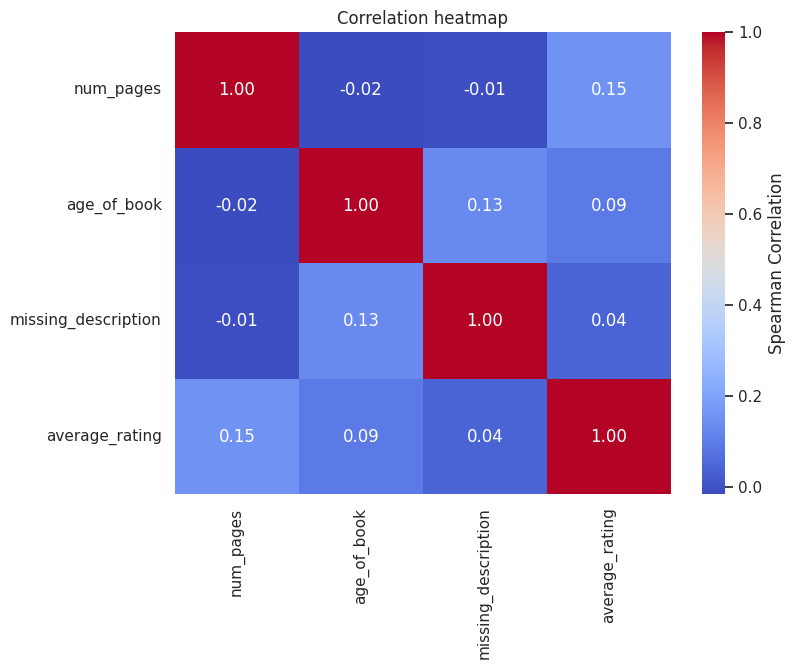

In [ ]:
cols_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[cols_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Correlation heatmap")

plt.show()

In [ ]:
books_missing = books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna())
      ]

In [ ]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0


**2. Identifying No. of Genres in Dataset**

In [ ]:
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
276,Electrons,1
275,Pigeons,1
274,Brothers and sisters,1
273,"Banks and banking, British",1


**3. Removing Short Descriptions**

In [ ]:
books_missing["words_in_description"] = books_missing["description"].str.split().str.len()

<ipython-input-12-6aa5122ce6f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing["words_in_description"] = books_missing["description"].str.split().str.len()


In [ ]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0,245


In [ ]:
books_missing.loc[books_missing["words_in_description"].between(1, 5), "description"]

,description
6,Donation.
11,Fantasy-roman.
77,Nonsense rhyming story. 4 yrs+
104,Library of Liberal Arts title.
682,Biography of John Wesley Powell.
...,...
6695,No Marketing Blurb
6704,Accessible and affordable illustrated biography
6721,Horror.
6757,Audio Book- unabriged on CD


In [ ]:
books_missing.loc[books_missing["words_in_description"].between(5, 15), "description"]

,description
2,Volume Two of Stephen Donaldson's acclaimed se...
38,Koko is Peter Straub's foray into the psycholo...
70,A matter of life and death - and the Throne of...
77,Nonsense rhyming story. 4 yrs+
83,Tie your tongue in terrible knots as you try t...
...,...
6730,Nineteen writers dig into the spaces between g...
6757,Audio Book- unabriged on CD
6767,Everything from the fingerprints of the gods t...
6776,Raymond Chandler meets The Exorcist. Classic n...


In [ ]:
books_missing.loc[books_missing["words_in_description"].between(15, 24), "description"]

,description
10,One of Sidney Sheldon's most popular and bests...
32,Tells the story of three generations of Chines...
36,A magical and fantastic collection of early st...
57,A young drifter finds more than he bargained f...
68,A new 'The Doors of Perception' for the 21st c...
...,...
6767,Everything from the fingerprints of the gods t...
6782,Displays one of America's leading physicist's ...
6783,Basics Illustration 01: Thinking Visually expl...
6789,Provides an introduction to the American artis...


In [ ]:
books_missing.loc[books_missing["words_in_description"].between(25, 34), "description"]

,description
9,Kate Blackwell is an enigma and one of the mos...
14,"Available in the U.S. for the first time, this..."
20,"It is 1937, and Charles Ashworth, a Canon to t..."
21,Reissue of the author's most famous and well-l...
46,No one believes a little girl when she insists...
...,...
6760,"Joel, an English teacher, has never really lik..."
6766,Discusses the historical and intellectual back...
6775,Presents nearly one thousand recipes--from app...
6779,Edited by the creator and executive producer o...


In [ ]:
books_missing_25_words = books_missing[books_missing["words_in_description"] >= 25]

In [ ]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174


**4. Combing Title and Subtitle**

In [ ]:
books_missing_25_words["title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(), books_missing_25_words["title"],
             books_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

<ipython-input-20-b883ca888c29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["title_and_subtitle"] = (


In [ ]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


**5. Tagged Description**

In [ ]:
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

<ipython-input-22-f0c64058ba24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


In [ ]:
books_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,21.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


**6. Save Cleaned Dataset**

In [ ]:
(
    books_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index = False)
)

# Developing LLM Model

**1. Install and load Langchain Modules**

In [ ]:
pip install langchain_community

In [ ]:
pip install langchain_openai

In [ ]:
pip install langchain_chroma

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma

**2. Create .env file with OpenAI and HuggingFace API Keys and load it**

In [ ]:
from dotenv import load_dotenv

load_dotenv("dot.env")

False

**3. Save Tagged Descriptions in seperate .txt file**

In [ ]:
import pandas as pd

books = pd.read_csv("books_cleaned.csv")

In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [ ]:
books["tagged_description"]

,tagged_description
0,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982 A new 'Christie for Christmas' -...
2,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897 Lewis' work on the nature of lov...
4,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...
5192,9788172235222 On A Train Journey Home To North...
5193,9788173031014 This book tells the tale of a ma...
5194,9788179921623 Wisdom to Create a Life of Passi...
5195,9788185300535 This collection of the timeless ...


**4. Splitting Books (Tagged Descriptions) using CharacterTextSplitter**

In [ ]:
books["tagged_description"].to_csv("tagged_description.txt",
                                   sep = "\n",
                                   index = False,
                                   header = False
                                   )

In [ ]:
raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")
documents = text_splitter.split_documents(raw_documents)

Streaming output truncated to the last 5000 lines.


In [ ]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

**5. Building the Vector Database**

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

db_books = Chroma.from_documents(
    documents,
    embedding=embedding_model
)

<ipython-input-36-beb07b4311c5>:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

**6. Getting Book Recommendations using Vector Search**

In [ ]:
query = "A book to teach children about nature"
docs = db_books.similarity_search(query, k=50)
docs

[Document(id='e24bc669-f7ba-462c-ac42-e2f015ae2c53', metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(id='326e8252-892d-4ab1-883c-d8ef62bac80a', metadata={'source': 'tagged_description.txt'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing the baby to some basic -- and sometimes playful -- information about the subjects."),
 Document(id='12b35ea7-5430-4318-bc57-0e94d946108a', metadata={'source': '

In [ ]:
books[books["isbn13"] == int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [ ]:
def retrieve_semantic_recommendations(query: str, top_k: int=10,) -> pd.DataFrame:
  recs = db_books.similarity_search(query, k=50)

  books_list = []

  for i in range(0, len(recs)):
    books_list += [int(recs[i].page_content.strip('"').split()[0])]

  return books[books["isbn13"].isin(books_list)].head(top_k)

In [ ]:
retrieve_semantic_recommendations("A book to teach children about nature")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
59,9780007151240,0007151241,The Family Way,Tony Parsons,Parenthood,http://books.google.com/books/content?id=dJEIx...,It should be the most natural thing in the wor...,2005.0,3.51,400.0,2095.0,The Family Way,9780007151240 It should be the most natural th...
324,9780060959036,0060959037,Prodigal Summer,Barbara Kingsolver,Fiction,http://books.google.com/books/content?id=06IwG...,Barbara Kingsolver's fifth novel is a hymn to ...,2001.0,4.00,444.0,85440.0,Prodigal Summer: A Novel,9780060959036 Barbara Kingsolver's fifth novel...
334,9780060976118,006097611X,Operation Wandering Soul,Richard Powers,Fiction,http://books.google.com/books/content?id=nIGIm...,"Highly imaginative and emotionally powerful, t...",1994.0,3.62,352.0,366.0,Operation Wandering Soul,9780060976118 Highly imaginative and emotional...
383,9780061144899,0061144894,When the Heart Waits,Sue Monk Kidd,Religion,http://books.google.com/books/content?id=JlP91...,From the Bestselling Author of The Secret Life...,2006.0,4.17,240.0,2141.0,When the Heart Waits: Spiritual Direction for ...,9780061144899 From the Bestselling Author of T...
404,9780064402453,0064402452,Racso and the Rats of NIMH,Jane Leslie Conly,Juvenile Fiction,http://books.google.com/books/content?id=MgoNv...,"‘Racso, a brash and boastful little rodent, is...",1988.0,3.76,288.0,3231.0,Racso and the Rats of NIMH,"9780064402453 ‘Racso, a brash and boastful lit..."
406,9780064403870,0064403874,"R-T, Margaret, and the Rats of NIMH",Jane Leslie Conly,Juvenile Fiction,http://books.google.com/books/content?id=WTHHH...,"When Margaret and her younger brother, Artie, ...",1991.0,3.52,272.0,631.0,"R-T, Margaret, and the Rats of NIMH",9780064403870 When Margaret and her younger br...
407,9780064404419,0064404412,The Rainbow People,Laurence Yep,Juvenile Fiction,http://books.google.com/books/content?id=5AHwq...,"""Culled from 69 stories collected in a [1930s]...",1992.0,3.75,208.0,202.0,The Rainbow People,"9780064404419 ""Culled from 69 stories collecte..."
416,9780064406925,006440692X,Winter on the Farm,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=IvlKH...,The Little House books tell the story of a lit...,1997.0,4.13,32.0,400.0,Winter on the Farm,9780064406925 The Little House books tell the ...
427,9780064434874,0064434877,Christmas in the Big Woods,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=FT1Yp...,"Long ago, a little girl named Laura Ingalls li...",1997.0,4.19,32.0,2062.0,Christmas in the Big Woods,"9780064434874 Long ago, a little girl named La..."
429,9780064434980,0064434982,The Deer in the Wood,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=V7YDW...,Even the youngest child can enjoy a special ad...,1999.0,4.17,32.0,302.0,The Deer in the Wood,9780064434980 Even the youngest child can enjo...


# Zero-Shot Classification

In [ ]:
books = pd.read_csv("books_cleaned.csv")

In [ ]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Human-animal relationships,1
475,Imperialism,1
476,Aged women,1
477,Humorous stories,1


In [ ]:
books["categories"].value_counts().reset_index().query("count > 50")

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
5,Religion,117
6,Philosophy,117
7,Comics & Graphic Novels,116
8,Drama,86
9,Juvenile Nonfiction,57


In [ ]:
books[books["categories"] == "Juvenile Fiction"]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...
79,9780020442608,0020442602,The voyage of the Dawn Treader,Clive Staples Lewis,Juvenile Fiction,http://books.google.com/books/content?id=fDD3C...,"The ""Dawn Treader"" is the first ship Narnia ha...",1970.0,4.09,216.0,2869.0,The voyage of the Dawn Treader,"9780020442608 The ""Dawn Treader"" is the first ..."
85,9780030547744,0030547741,Where the Red Fern Grows,Wilson Rawls,Juvenile Fiction,http://books.google.com/books/content?id=IHpRw...,A young boy living in the Ozarks achieves his ...,2000.0,4.37,288.0,95.0,Where the Red Fern Grows: The Story of Two Dog...,9780030547744 A young boy living in the Ozarks...
86,9780060000141,0060000147,Poppy's Return,Avi,Juvenile Fiction,http://books.google.com/books/content?id=XbcMJ...,"There's trouble at Gray House, the girlhood ho...",2006.0,3.99,256.0,1086.0,Poppy's Return,"9780060000141 There's trouble at Gray House, t..."
87,9780060001537,0060001534,Diary of a Spider,Doreen Cronin,Juvenile Fiction,http://books.google.com/books/content?id=UWvZo...,This is the diary ... of a spider. But don't b...,2005.0,4.25,40.0,7903.0,Diary of a Spider,9780060001537 This is the diary ... of a spide...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,9781590385814,1590385810,Fablehaven,Brandon Mull,Juvenile Fiction,http://books.google.com/books/content?id=tbVIP...,When Kendra and Seth go to stay at their grand...,2006.0,4.09,351.0,111896.0,Fablehaven,9781590385814 When Kendra and Seth go to stay ...
4930,9781596792500,1596792507,Sherlock Holmes and the Case of the Hound of t...,Arthur Conan Doyle;Malvina G. Vogel,Juvenile Fiction,http://books.google.com/books/content?id=EWgWP...,Sherlock Holmes and Dr. Watson travel to the b...,2005.0,4.51,237.0,28.0,Sherlock Holmes and the Case of the Hound of t...,9781596792500 Sherlock Holmes and Dr. Watson t...
4942,9781599900056,159990005X,The Drift House,Dale Peck,Juvenile Fiction,http://books.google.com/books/content?id=kbwPY...,Sent to stay with their uncle in a ship-like h...,2006.0,3.64,437.0,595.0,The Drift House: The First Voyage,9781599900056 Sent to stay with their uncle in...
5010,9781844580514,1844580512,Attack of the Jaguar,M. A. Harvey,Juvenile Fiction,http://books.google.com/books/content?id=3HUdt...,This training manual for operatives of Xtreme ...,2004.0,3.40,125.0,4.0,Attack of the Jaguar,9781844580514 This training manual for operati...


In [ ]:
books[books["categories"] == "Juvenile Nonfiction"]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
107,9780060277406,0060277408,The Secret Garden Cookbook,Amy Cotler,Juvenile Nonfiction,http://books.google.com/books/content?id=c7E_H...,Frances Hodgson Burnett's The Secret Garden de...,1999.0,4.28,128.0,142.0,The Secret Garden Cookbook: Recipes Inspired b...,9780060277406 Frances Hodgson Burnett's The Se...
108,9780060278427,0060278420,Laura's Album,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=_zTkq...,Though best known as the author of the Little ...,1998.0,4.30,80.0,713.0,Laura's Album: A Remembrance Scrapbook of Laur...,9780060278427 Though best known as the author ...
228,9780060782139,0060782137,Time For Kids: Butterflies!,Editors of TIME For Kids,Juvenile Nonfiction,http://books.google.com/books/content?id=OdZxn...,"Butterflies There are 20,000 different kinds o...",2006.0,4.00,32.0,20.0,Time For Kids: Butterflies!,"9780060782139 Butterflies There are 20,000 dif..."
267,9780060882600,0060882603,The Annotated Charlotte's Web,E. B. White,Juvenile Nonfiction,http://books.google.com/books/content?id=vaYYH...,"Charlotte's Web, one of America's best-loved c...",2006.0,4.16,320.0,41.0,The Annotated Charlotte's Web,"9780060882600 Charlotte's Web, one of America'..."
434,9780064462044,0064462048,My Little House Crafts Book,Carolyn Strom Collins,Juvenile Nonfiction,http://books.google.com/books/content?id=lTzrs...,Make the same pioneer crafts that Laura did! I...,1998.0,4.05,64.0,56.0,My Little House Crafts Book: 18 Projects from ...,9780064462044 Make the same pioneer crafts tha...
435,9780064462341,006446234X,Pioneer Girl,William Anderson,Juvenile Nonfiction,http://books.google.com/books/content?id=Sj4UD...,The pioneer spirit lives on... Readers around ...,2000.0,4.15,32.0,414.0,Pioneer Girl: The Story of Laura Ingalls Wilder,9780064462341 The pioneer spirit lives on... R...
439,9780066236179,0066236177,A Light in the Attic Book and CD,Shel Silverstein,Juvenile Nonfiction,http://books.google.com/books/content?id=FJfQs...,Last night while I lay thinking here Some What...,2001.0,4.34,176.0,590.0,A Light in the Attic Book and CD,9780066236179 Last night while I lay thinking ...
812,9780142302279,0142302279,Dirty Beasts,Roald Dahl,Juvenile Nonfiction,NaN,Poems tell the stories of a smart pig who outw...,2002.0,4.02,32.0,3953.0,Dirty Beasts,9780142302279 Poems tell the stories of a smar...
821,9780142407226,0142407224,The Tough Guide to Fantasyland,Diana Wynne Jones,Juvenile Nonfiction,http://books.google.com/books/content?id=v5jxA...,A unique guide to fantasy literature helps rea...,2006.0,3.94,234.0,3897.0,The Tough Guide to Fantasyland,9780142407226 A unique guide to fantasy litera...
823,9780142407929,0142407925,The BFG,Roald Dahl;David Wood;Jane Walmsley,Juvenile Nonfiction,http://books.google.com/books/content?id=aDf-O...,"With notes on staging, props, and costumes, a ...",2007.0,4.26,128.0,452.0,The BFG: A Set of Plays,"9780142407929 With notes on staging, props, an..."


In [ ]:
category_mapping = {'Fiction' : "Fiction",
'Juvenile Fiction': "Children's Fiction",
'Biography & Autobiography': "Nonfiction",
'History': "Nonfiction",
'Literary Criticism': "Nonfiction",
'Philosophy': "Nonfiction",
'Religion': "Nonfiction",
'Comics & Graphic Novels': "Fiction",
'Drama': "Fiction",
'Juvenile Nonfiction': "Children's Nonfiction",
'Science': "Nonfiction",
'Poetry': "Fiction"}

books["simple_categories"] = books["categories"].map(category_mapping)

In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [ ]:
books[~(books["simple_categories"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,Fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,Children's Fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin...",Fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,Fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


**Classifying Book Descriptions**

In [ ]:
from transformers import pipeline

fiction_categories = ["Fiction", "Nonfiction"]

pipe = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[0]

In [ ]:
pipe(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [ ]:
import numpy as np

max_index = np.argmax(pipe(sequence, fiction_categories)["scores"])
max_label = pipe(sequence, fiction_categories)["labels"][max_index]

max_label

'Fiction'

In [ ]:
def generate_predictions(sequence, categories):
  predictions = pipe(sequence, categories)
  max_index = np.argmax(predictions["scores"])
  max_label = predictions["labels"][max_index]
  return max_label

**Checking Classifier Accuracy**

In [ ]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

for i in tqdm(range(0, 300)):
  sequence = books.loc[books["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[i]
  predicted_cats += [generate_predictions(sequence, fiction_categories)]
  actual_cats += ["Fiction"]

100%|██████████| 300/300 [00:23<00:00, 12.89it/s]


In [ ]:
for i in tqdm(range(0, 300)):
  sequence = books.loc[books["simple_categories"] == "Nonfiction", "description"].reset_index(drop=True)[i]
  predicted_cats += [generate_predictions(sequence, fiction_categories)]
  actual_cats += ["Nonfiction"]

100%|██████████| 300/300 [00:24<00:00, 12.27it/s]


In [ ]:
predictions_df = pd.DataFrame({"actual_categories": actual_cats, "predicted_categories": predicted_cats})

In [ ]:
predictions_df

,actual_categories,predicted_categories
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
...,...,...
595,Nonfiction,Nonfiction
596,Nonfiction,Fiction
597,Nonfiction,Nonfiction
598,Nonfiction,Nonfiction


In [ ]:
predictions_df["correct_predictions"] = (
    np.where(predictions_df["actual_categories"] == predictions_df["predicted_categories"], 1, 0)
)

In [ ]:
predictions_df["correct_predictions"].sum() / len(predictions_df)

0.7783333333333333

In [ ]:
isbns = []
predicted_cats = []

missing_cats = books.loc[books["simple_categories"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [ ]:
for i in tqdm(range(0, len(missing_cats))):
  sequence = missing_cats["description"][i]
  predicted_cats += [generate_predictions(sequence, fiction_categories)]
  isbns += [missing_cats["isbn13"][i]]

100%|██████████| 1454/1454 [01:58<00:00, 12.28it/s]


In [ ]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_categories": predicted_cats})

In [ ]:
missing_predicted_df

,isbn13,predicted_categories
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1449,9788125026600,Nonfiction
1450,9788171565641,Fiction
1451,9788172235222,Fiction
1452,9788173031014,Nonfiction


In [ ]:
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")
books["simple_categories"] = np.where(books["simple_categories"].isna(), books["predicted_categories"], books["simple_categories"])
books = books.drop(columns = ["predicted_categories"])

In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction


In [ ]:
books[books["categories"].str.lower().isin([
    "romance",
    "science fiction",
    "scifi",
    "fantasy"
    "horror",
    "mystery",
    "thriller",
    "comedy"
    "crime",
    "historical"
])]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
24,9780006513087,0006513085,Gravity,Tess Gerritsen,Science fiction,http://books.google.com/books/content?id=KI66c...,Emma Watson a research physician has been trai...,2004.0,4.04,342.0,8024.0,Gravity,9780006513087 Emma Watson a research physician...,Nonfiction
475,9780099410355,0099410354,Traitor,Matthew Woodring Stover,Science fiction,http://books.google.com/books/content?id=VbICO...,"From the depths of catastrophe, a glimmer of h...",2002.0,4.00,320.0,6765.0,Traitor,"9780099410355 From the depths of catastrophe, ...",Fiction
1435,9780340837955,0340837950,Stranger in a Strange Land,Robert A. Heinlein,Science fiction,http://books.google.com/books/content?id=ZQhiP...,"Epic, entertaining, Stranger in a Strange Land...",2005.0,3.92,672.0,563.0,Stranger in a Strange Land,"9780340837955 Epic, entertaining, Stranger in ...",Fiction
1439,9780345251220,0345251229,Visions from Nowhere,William Arrow,Science fiction,NaN,"The first novel in the series, ""Return to the ...",1976.0,3.23,183.0,10.0,Visions from Nowhere,"9780345251220 The first novel in the series, ""...",Fiction
3289,9780739439708,0739439707,Time Quartet,Madeleine L'Engle,Science fiction,NaN,"Blending magic with quantum physics, Madeleine...",2003.0,4.35,646.0,165.0,Time Quartet,9780739439708 Blending magic with quantum phys...,Fiction
3563,9780760728505,076072850X,"20,000 Leagues Under the Sea",Jules Verne,Science fiction,NaN,Retells the adventures of a French professor a...,2002.0,3.88,394.0,135778.0,"20,000 Leagues Under the Sea",9780760728505 Retells the adventures of a Fren...,Fiction
5040,9781857231359,185723135X,Use of Weapons,Iain Banks,Science fiction,NaN,The man known as Cheradenine Zakalwe was one o...,1992.0,4.19,411.0,30779.0,Use of Weapons,9781857231359 The man known as Cheradenine Zak...,Nonfiction
5057,9781857989342,1857989341,The Gods Themselves,Isaac Asimov,Science fiction,http://books.google.com/books/content?id=8ClIP...,"In the year 2100, mankind on Earth, settlers i...",2000.0,4.09,288.0,41304.0,The Gods Themselves,"9781857989342 In the year 2100, mankind on Ear...",Fiction


In [ ]:
books.to_csv("books_with_categories.csv", index=False)

# Finding Fine-Tuned LLMS for Sentiment Analysis

In [ ]:
import pandas as pd

books = pd.read_csv("books_with_categories.csv")

In [ ]:
from transformers import pipeline

classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      top_k=None)

classifier("I love this!")

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.00852868054062128},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'sadness', 'score': 0.0020923891570419073},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.00041385178337804973}]]

**Extracting Emotions from Book Descriptions**

In [ ]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [ ]:
classifier(books["description"][0])

[[{'label': 'fear', 'score': 0.6548413634300232},
  {'label': 'neutral', 'score': 0.16985207796096802},
  {'label': 'sadness', 'score': 0.11640888452529907},
  {'label': 'surprise', 'score': 0.02070062793791294},
  {'label': 'disgust', 'score': 0.019100705161690712},
  {'label': 'joy', 'score': 0.015161297284066677},
  {'label': 'anger', 'score': 0.003935146611183882}]]

In [ ]:
classifier(books["description"][0].split("."))

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [ ]:
sentences = books["description"][0].split(".")
predictions = classifier(sentences)

In [ ]:
sentences[0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives'

In [ ]:
predictions[0]

[{'label': 'surprise', 'score': 0.7296026945114136},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'sadness', 'score': 0.0021221605129539967}]

In [ ]:
sentences[4]

' He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption'

In [ ]:
predictions[4]

[{'label': 'sadness', 'score': 0.9671575427055359},
 {'label': 'neutral', 'score': 0.015104170888662338},
 {'label': 'disgust', 'score': 0.006480592768639326},
 {'label': 'fear', 'score': 0.005393994972109795},
 {'label': 'surprise', 'score': 0.0022869433742016554},
 {'label': 'anger', 'score': 0.0018428893527016044},
 {'label': 'joy', 'score': 0.0017338789766654372}]

In [ ]:
predictions

[[{'label': 'surprise', 'score': 0.7296026945114136},
  {'label': 'neutral', 'score': 0.1403856873512268},
  {'label': 'fear', 'score': 0.06816219538450241},
  {'label': 'joy', 'score': 0.04794241115450859},
  {'label': 'anger', 'score': 0.009156348183751106},
  {'label': 'disgust', 'score': 0.00262847519479692},
  {'label': 'sadness', 'score': 0.0021221605129539967}],
 [{'label': 'neutral', 'score': 0.44937071204185486},
  {'label': 'disgust', 'score': 0.2735914885997772},
  {'label': 'joy', 'score': 0.10908304899930954},
  {'label': 'sadness', 'score': 0.09362724423408508},
  {'label': 'anger', 'score': 0.040478333830833435},
  {'label': 'surprise', 'score': 0.02697017975151539},
  {'label': 'fear', 'score': 0.006879060063511133}],
 [{'label': 'neutral', 'score': 0.6462162137031555},
  {'label': 'sadness', 'score': 0.2427332103252411},
  {'label': 'disgust', 'score': 0.04342261329293251},
  {'label': 'surprise', 'score': 0.028300540521740913},
  {'label': 'joy', 'score': 0.0142114423

In [ ]:
sorted(predictions[0], key=lambda x: x["label"])

[{'label': 'anger', 'score': 0.009156348183751106},
 {'label': 'disgust', 'score': 0.00262847519479692},
 {'label': 'fear', 'score': 0.06816219538450241},
 {'label': 'joy', 'score': 0.04794241115450859},
 {'label': 'neutral', 'score': 0.1403856873512268},
 {'label': 'sadness', 'score': 0.0021221605129539967},
 {'label': 'surprise', 'score': 0.7296026945114136}]

In [ ]:
import numpy as np

emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

def calculate_max_emotion_scores(predictions):
  per_emotion_scores = {label: [] for label in emotion_labels}
  for prediction in predictions:
    sorted_predictions = sorted(prediction, key=lambda x: x["label"])
    for index, label in enumerate(emotion_labels):
      per_emotion_scores[label].append(sorted_predictions[index]["score"])

  return {label: np.max(scores) for label, scores in per_emotion_scores.items()}

In [ ]:
for i in range(10):
  isbn.append(books["isbn13"][i])
  sentences = books["description"][i].split(".")
  predictions = classifier(sentences)
  max_scores = calculate_max_emotion_scores(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_scores[label])

In [ ]:
emotion_scores

{'anger': [0.0641336739063263,
  0.6126185059547424,
  0.0641336739063263,
  0.35148391127586365,
  0.08141247183084488,
  0.2322249710559845,
  0.5381842255592346,
  0.0641336739063263,
  0.30067017674446106,
  0.0641336739063263],
 'disgust': [0.2735914885997772,
  0.3482844829559326,
  0.10400670021772385,
  0.15072263777256012,
  0.1844954937696457,
  0.727174699306488,
  0.15585491061210632,
  0.10400670021772385,
  0.2794813811779022,
  0.1779276728630066],
 'fear': [0.928167998790741,
  0.9425278306007385,
  0.9723208546638489,
  0.36070623993873596,
  0.09504325687885284,
  0.05136282742023468,
  0.7474286556243896,
  0.4044959247112274,
  0.9155241250991821,
  0.05136282742023468],
 'joy': [0.9327971935272217,
  0.7044215202331543,
  0.7672368884086609,
  0.25188079476356506,
  0.040564440190792084,
  0.04337584972381592,
  0.8725654482841492,
  0.040564440190792084,
  0.040564440190792084,
  0.040564440190792084],
 'sadness': [0.6462162137031555,
  0.887939453125,
  0.5494765

In [ ]:
from tqdm import tqdm

In [ ]:
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

for i in tqdm(range(len(books))):
  isbn.append(books["isbn13"][i])
  sentences = books["description"][i].split(".")
  predictions = classifier(sentences)
  max_scores = calculate_max_emotion_scores(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_scores[label])


100%|██████████| 5197/5197 [02:29<00:00, 34.71it/s]


In [ ]:
emotions_df = pd.DataFrame(emotion_scores)
emotions_df["isbn13"] = isbn

In [ ]:
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603,9780002005883
1,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545,9780002261982
2,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766,9780006178736
3,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766,9780006280897
4,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766,9788185300535


In [ ]:
books = pd.merge(books, emotions_df, on = "isbn13")

In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,...,title_and_subtitle,tagged_description,simple_categories,anger,disgust,fear,joy,sadness,surprise,neutral
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,...,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction,0.064134,0.273591,0.928168,0.932797,0.646216,0.967158,0.729603
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,...,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...,Fiction,0.612619,0.348284,0.942528,0.704422,0.887939,0.111690,0.252545
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,...,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",Fiction,0.064134,0.104007,0.972321,0.767237,0.549477,0.111690,0.078766
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,...,The Four Loves,9780006280897 Lewis' work on the nature of lov...,Nonfiction,0.351484,0.150723,0.360706,0.251881,0.732685,0.111690,0.078766
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,...,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",Nonfiction,0.081412,0.184495,0.095043,0.040564,0.884390,0.475881,0.078766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,...,Mistaken Identity,9788172235222 On A Train Journey Home To North...,Fiction,0.148208,0.030643,0.919165,0.255170,0.853722,0.980877,0.030656
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,...,Journey to the East,9788173031014 This book tells the tale of a ma...,Nonfiction,0.064134,0.114383,0.051363,0.400263,0.883199,0.111690,0.227765
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,...,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,Fiction,0.009997,0.009929,0.339218,0.947779,0.375755,0.066685,0.057625
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,...,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,Nonfiction,0.064134,0.104007,0.459269,0.759455,0.951104,0.368111,0.078766


In [ ]:
books.to_csv("books_with_emotions.csv", index = False)

# Building the UI with Gradio

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 53.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu

In [ ]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv

from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

import gradio as gr


load_dotenv()

books = pd.read_csv("books_with_emotions.csv")
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["large_thumbnail"].isna(),
    "cover-not-available.jpg",
    books["large_thumbnail"],
)

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(separator="\n", chunk_size=0, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)
db_books = Chroma.from_documents(documents, embedding=embedding_model)


def retrieve_semantic_recommendations(query: str, category: str = None, tone: str = None, inital_top_k: int = 50, final_top_k: int = 16) -> pd.DataFrame:

  recs = db_books.similarity_search(query, k=initial_top_k)
  books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
  book_recs = books[books["isbn13"].isin(books_list)].head(final_top_k)

  if category != "All":
    book_recs = book_recs[book_recs["simple_categories"] == category][:final_top_k]
  else:
    book_recs = book_recs.head(final_top_k)

  if tone == "Joyful":
    book_recs.sort_values(by="joy", ascending=False, inplace=True)
  elif tone == "Surprising":
    book_recs.sort_values(by="surprise", ascending=False, inplace=True)
  elif tone == "Angry":
    book_recs.sort_values(by="anger", ascending=False, inplace=True)
  elif tone == "Suspenseful":
    book_recs.sort_values(by="fear", ascending=False, inplace=True)
  elif tone == "Sad":
    book_recs.sort_values(by="sadness", ascending=False, inplace=True)

  return book_recs


def recommend_books(query: str, category: str, tone: str):

  recommendations = retrieve_semantic_recommendations(query, category, tone)
  results = []

  for _, row in recommendations.iterrows():
    description = row["description"]
    truncated_desc_split = description.split()
    truncated_description = " ".join(truncated_desc_split[:30]) + "..."

    authors_split = row["authors"].split(";")
    if len(authors_split) == 2:
      authors_str = f"{authors_split[0]} and {authors_split[1]}"
    elif len(authors_split) > 2:
      authors_str = f"{', '.join(authors_split[:-1])}, and {authors_split[-1]}"
    else:
      authors_str = row["authors"]

    caption = f"{row['title']} by {authors_str}: {truncated_description}"
    results.append((row["large_thumbnail"], caption))

    return results

categories = ["All"] + sorted(books["simple_categories"].unique())
tones = ["All"] + ["Joyful", "Surprising", "Angry", "Suspenseful", "Sad"]

with gr.Blocks(theme = gr.themes.Glass()) as dashboard:
  gr.Markdown("# Semantic Book Recommender 1.0")

  with gr.Row():
    user_query = gr.Textbox(label = "Please enter a description of a book to read:", placeholder = "i.e., A story about nature")
    category_dropdown = gr.Dropdown(choices = categories, label = "Select a genre:", value = "All")
    tone_dropdown = gr.Dropdown(choices = tones, label = "Select an emotional tone:", value = "All")
    submit_button = gr.Button("Search for Recommendations")

  gr.Markdown("## Book Recommendations")
  output = gr.Gallery(label = "Recommended books for you!", columns = 8, rows = 2)

  submit_button.click(fn = recommend_books, inputs = [user_query, category_dropdown, tone_dropdown], outputs = output)


if __name__ == "__main__":
  dashboard.launch()



Streaming output truncated to the last 5000 lines.


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8db24137f6fcaca5bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
